<h1>Análisando algoritmos de ordenamiento</h1>

In [16]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por mezcla </h3>

In [45]:
def merge_sort(A): 

    n = len(A) 
    if(n == 1): return A
 
    left = merge_sort(A[:(n/2)]) 
    right = merge_sort(A[(n/2):]) 
 
    return merge(left, right) 
 
def merge(left, right): 
 
    result = [] 
    i = 0 
    j = 0 
    len_left = len(left) 
    len_right = len(right) 
 
    while(i < len_left or j < len_right): 
        if(i >= len_left): 
            result.append(right[j]) 
            j = j + 1 
        elif(j >= len_right): 
            result.append(left[i]) 
            i = i + 1 
        elif(left[i] < right[j]): 
            result.append(left[i]) 
            i = i + 1 
        else: 
            result.append(right[j]) 
            j = j + 1 
 
    return result 

In [46]:
B = np.random.permutation(range(0,10))
print B
print merge_sort(B)

[5 1 3 9 2 4 0 6 8 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [19]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [20]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [21]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [22]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [23]:
def wrong_merge_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [24]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_merge_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [25]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [26]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 125


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [27]:
import random as rnd
import time

def exper_analysis(n):
    analysis= []
    results = []
    tiempo = []
    acct = Counter()
    for i in range(n):
        tic = time.clock()#get start time
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
    analysis.append(results)
    analysis.append(tiempo)
    return analysis

In [28]:
print (exper_analysis(10))

[[2, 2, 11, 23, 35, 44, 59, 44, 80, 125], [1.556045617956414e-05, 6.95254425053804e-06, 1.9202265072681968e-05, 2.3506221037417063e-05, 3.343842710945566e-05, 3.9066677216981205e-05, 5.065425096772991e-05, 4.0390971359771655e-05, 6.687685421868927e-05, 9.79977665780396e-05]]


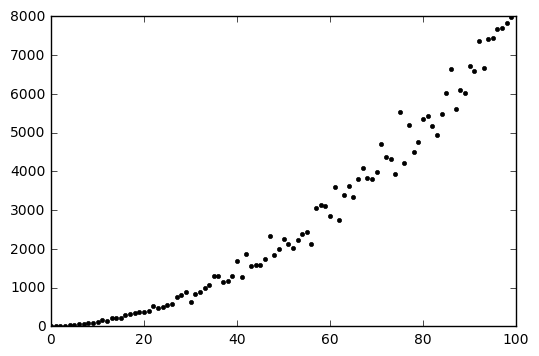

In [29]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100)[0])
pl.plot(x, y, 'k.')

<b>Análisis de Tiempo </b>
 
  <p>A continuación se representa en una gráfica el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (variando n) en el peor de los casos.</p>
  

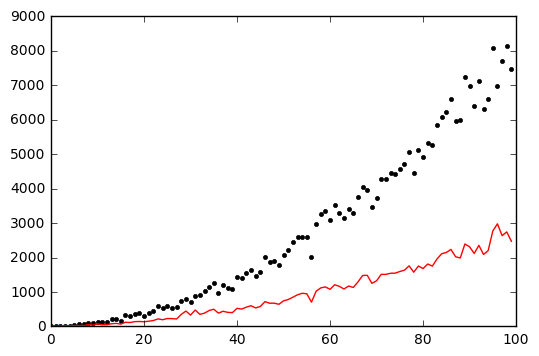

In [30]:
pl.clf()
resultados= []
x = np.arange(100)
resultados = np.array(exper_analysis(100))
y = np.array(resultados[0])
t = np.array(resultados[1]*1000000)
pl.plot(x, y,'k.', t, 'r')